# Forward-Forward Algorithm

learning algorithm  instead of using forward pass and backward pass , replace it with two forward passes.

In [14]:
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from typing import List, Tuple

import torch
import torch.nn as nn
from torch.optim import Adam

import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize, Lambda
from torch.utils.data import DataLoader

from utils import *

In [2]:
use_cuda = torch.cuda.is_available()
use_mps = torch.backends.mps.is_available()

if use_cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")
    
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

load the dataset loader

In [3]:
train_loader,test_loader = mnist_loaders()

#### Add y (one hot encoded lable) in the first 10 pixels of image

In [4]:
x, y = next(iter(train_loader))

x.to(device)
y.to(device)

positive_sample = generate_sample_overlay(x, y)
negative_sample = generate_sample_overlay(x, y,'negative')

#### Plot 10x10 of positive samples

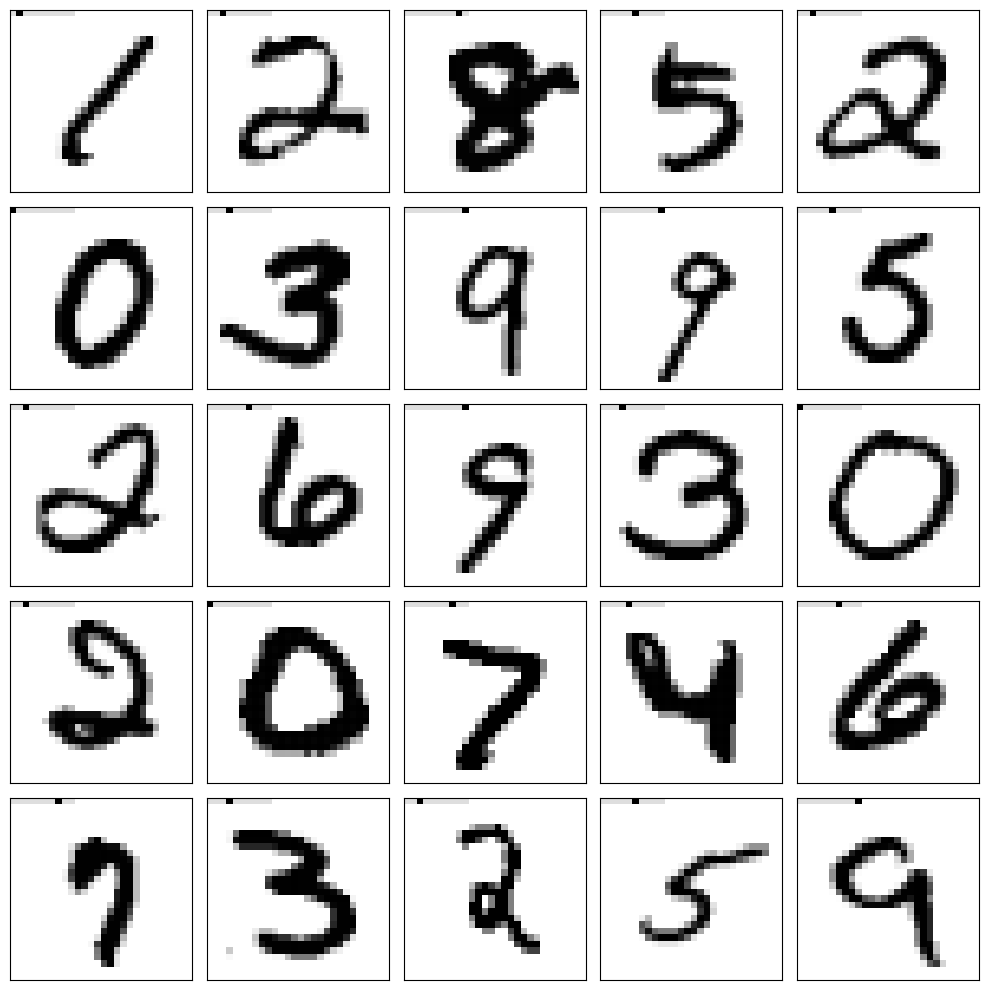

In [5]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
      index = i * 10 + j
      if index < positive_sample.shape[0]:
          axes[i, j].imshow(positive_sample[index].detach().numpy().reshape(28,28), cmap='binary')
          axes[i, j].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.tight_layout()
plt.show()

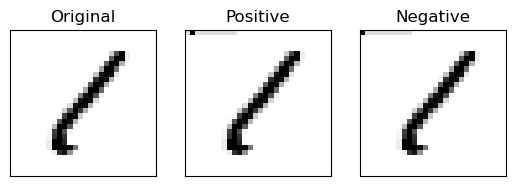

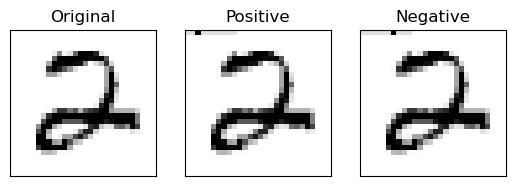

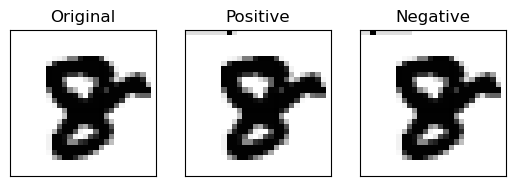

In [6]:
show_sample(x, positive_sample, negative_sample)

# Modeling

In [7]:
net = FF_Net([784, 512,512]); net.to(device); print(net.layers)

[FF_Layer(
  in_features=784, out_features=512, bias=True
  (relu): ReLU()
), FF_Layer(
  in_features=512, out_features=512, bias=True
  (relu): ReLU()
)]


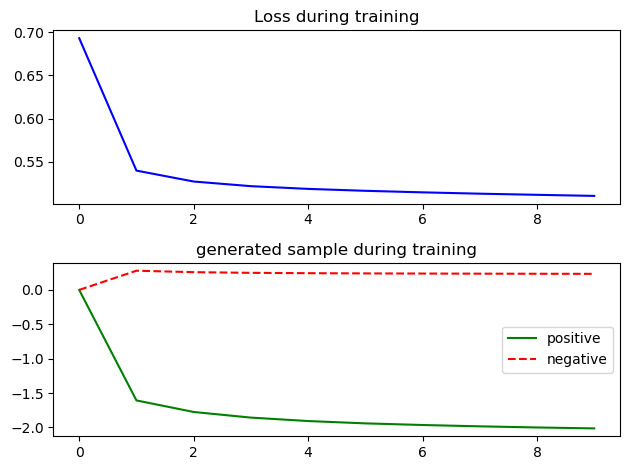

 90%|█████████ | 901/1000 [03:52<00:33,  3.00it/s]

Loss at step 900: 0.5106796026229858


100%|██████████| 1000/1000 [04:19<00:00,  3.86it/s]

------------------------------------------------------------
training done.


In [8]:
net.train(positive_sample, negative_sample)

In [9]:
print(f'train error :', 1.0 - net.predict(x).eq(y).float().mean().item())

x_test, y_test = next(iter(test_loader))

print('test error:', 1.0 - net.predict(x_test).eq(y_test).float().mean().item())

train error : 0.06088000535964966
test error: 0.06730002164840698


In [10]:
print("Test Accuracy: {:.2f}%".format(100 * net.predict(x_test).eq(y_test).float().mean().item()))

Test Accuracy: 93.27%


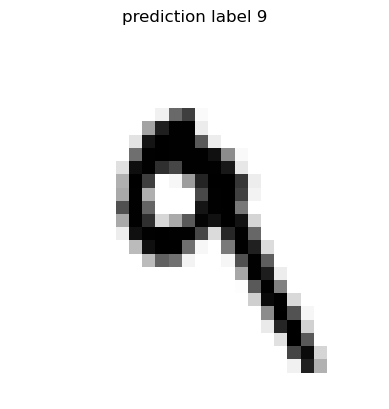

In [11]:
y_pred = torch.argmax(net.predict(x_test)).item(); y_test[y_pred].item()

plt.imshow(x_test[y_pred].reshape(28,28),cmap='binary')
plt.title(f'prediction label {y_test[y_pred].item()}')
plt.axis('off')
plt.show()

### Show 10x10 out of fist hidden layer

In [12]:
hidden_layer_1 = net.layers[0].weight.data

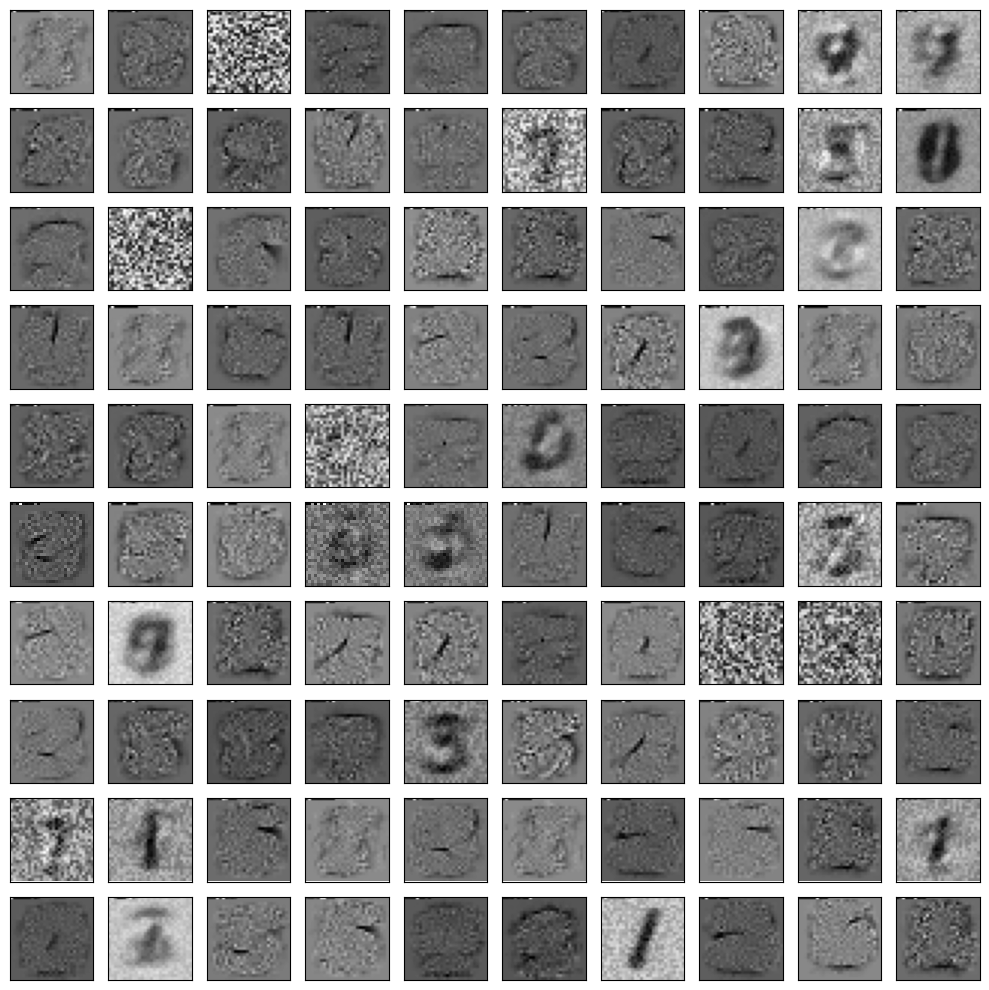

In [13]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
      index = i * 10 + j
      if index < hidden_layer_1.shape[0]:
          axes[i, j].imshow(hidden_layer_1[index].detach().numpy().reshape(28, 28), cmap='gray')
          axes[i, j].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.tight_layout()
plt.show()